<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Bayesian Updating with Conjugate Priors



# Bayes Theorem
<hr style = "border:2px solid black" ></hr>


- Bayes' theorem updates the beliefs about the parameters of interest by computing the posterior probability distribution from the following input:

    - The **prior** distribution indicates how likely we consider each possible hypothesis.
    - The **likelihood function** outputs the probability of observing a dataset when given certain values for the parameters   , that is, for a specific hypothesis.
    - The **evidence** measures how likely the observed data is, given all possible hypotheses. Hence, it is the same for all parameter values and serves to normalize the numerator. 

- The posterior is the product of prior and likelihood, divided by the evidence. Thus, it reflects the probability distribution of the hypothesis, updated by taking into account both prior assumptions and the data. 

- Viewed differently, the posterior probability results from applying the chain rule, which, in turn, factorizes the joint distribution of data and parameters.



 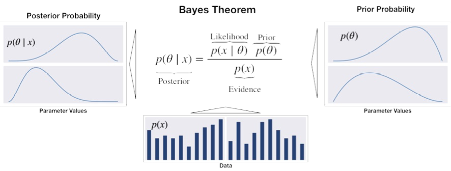

# Conjugate priors
<hr style = "border:2px solid black" ></hr>


- A prior distribution is conjugate with respect to the likelihood when the resulting posterior is of the same class or family of distributions as the prior, except for different parameters. For example, when both the prior and the likelihood are normally distributed, then the posterior is also normally distributed.

- The conjugacy of prior and likelihood implies a closed-form solution for the posterior that facilitates the update process and avoids the need to use numerical methods to approximate the posterior. Moreover, the resulting posterior can be used as the prior for the next update step.



# Imports
<hr style = "border:2px solid black" ></hr>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

np.random.seed(42)
sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

# Helper function
<hr style = "border:2px solid black" ></hr>

In [5]:
def format_plot(axes, i, p, y, trials, success, true_p, tmle, tmap=None):
    fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
    if i >= 6:
        axes[i].set_xlabel("$p$, Success Probability")
        axes[i].xaxis.set_major_formatter(fmt)
    else:
        axes[i].axes.get_xaxis().set_visible(False)
    if i % 3 == 0:
        axes[i].set_ylabel("Posterior Probability")
    axes[i].set_yticks([])

    axes[i].plot(p, y, lw=1, c='k')
    axes[i].fill_between(p, y, color='darkblue', alpha=0.4)
    axes[i].vlines(true_p, 0, max(10, np.max(y)),
                   color='k', linestyle='--', lw=1)
    axes[i].set_title(f'Trials: {trials:,d} - Success: {success:,d}')
    if i > 0:
        smle = r"$\theta_{{\mathrm{{MLE}}}}$ = {:.2%}".format(tmle)
        axes[i].text(x=.02, y=.85, s=smle, transform=axes[i].transAxes)
        smap = r"$\theta_{{\mathrm{{MAP}}}}$ = {:.2%}".format(tmap)
        axes[i].text(x=.02, y=.75, s=smap, transform=axes[i].transAxes)
    return axes[i]

# Example
<hr style = "border:2px solid black" ></hr>


- When the data consists of binary Bernoulli random variables with a certain success probability for a positive outcome, the number of successes in repeated trials follows a Binomial distribution. The conjugate prior is the Beta distribution with support over the interval [0, 1] and two shape parameters to model arbitrary prior distributions over the success probability. Hence, the posterior distribution is also a Beta distribution that we can derive by directly updating the parameters.

-  Simulate Coin Tosses & Updates of Posterior
    


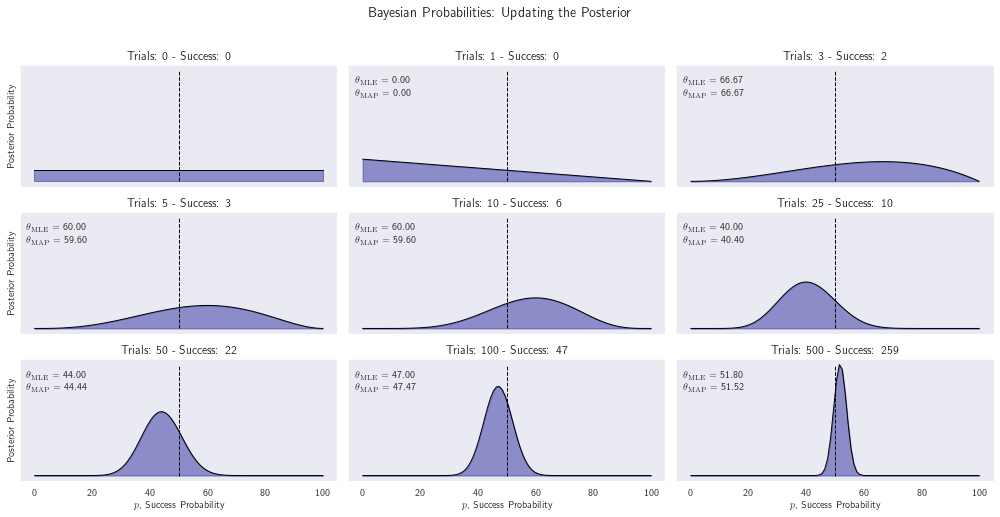

In [6]:
n_trials = [0, 1, 3, 5, 10, 25, 50, 100, 500]
outcomes = stats.bernoulli.rvs(p=0.5, size=n_trials[-1])
p = np.linspace(0, 1, 100)
# uniform (uninformative) prior
a = b = 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
for i, trials in enumerate(n_trials):
    successes = outcomes[:trials]
    theta_mle = np.mean(successes)
    heads = sum(successes)
    tails = trials - heads
    update = stats.beta.pdf(p, a + heads, b + tails)
    theta_map = pd.Series(update, index=p).idxmax()
    axes[i] = format_plot(axes, i, p, update, trials=trials, success=heads,
                          true_p=.5, tmle=theta_mle, tmap=theta_map)

title = 'Bayesian Probabilities: Updating the Posterior'
fig.suptitle(title,  y=1.02, fontsize=14)
fig.tight_layout()


- The resulting posterior distributions have been plotted in the following image. 

- They illustrate the evolution from a uniform prior that views all success probabilities as equally likely to an increasingly peaked distribution.



# Conclusion
<hr style = "border:2px solid black" ></hr>


- In practice, the use of conjugate priors is limited to low-dimensional cases. In addition, the simplified MAP approach avoids computing the evidence term but has a key shortcoming, even when it is available: it does not return a distribution so that we can derive a measure of uncertainty or use it as a prior. 
    
- Hence, we need to resort to an approximate rather than exact inference using numerical methods and **stochastic simulations**.
    


# References
<hr style = "border:2px solid black" ></hr>


- Jansen, Stefan. Hands-On Machine Learning for Algorithmic Trading: Design and implement investment strategies based on smart algorithms that learn from data using Python. Packt Publishing Ltd, 2018.
- https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/10_bayesian_machine_learning/01_updating_conjugate_priors.ipynb
- https://www.quantstart.com/articles/Bayesian-Statistics-A-Beginners-Guide/
    
